In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Get the data

In [110]:
train=pd.read_csv('train_data.csv')

In [111]:
train.head()

,CustomerID,Surname,NetworkScore,Region,Gender,Age,Tenure,MonthlyCharge,NumOfProducts,HasInternetService,IsActiveMember,EstimatedMonthlyUsage,Exited
0,4971,Moreno,25.0,South,Female,26.0,11,134.20,1,0,1.0,NaN,1
1,2858,Bell,68.0,North,Female,60.0,17,25.72,3,1,1.0,533.40,0
2,5794,Baker,34.0,North,Male,28.0,7,131.03,2,0,0.0,509.04,0
3,3996,Jackson,13.0,South,Male,65.0,2,64.27,3,0,1.0,246.48,0
4,2680,Craig,50.0,East,Female,60.0,16,41.26,3,1,1.0,902.28,1


In [112]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             4020 non-null   int64  
 1   Surname                4020 non-null   object 
 2   NetworkScore           3821 non-null   float64
 3   Region                 4020 non-null   object 
 4   Gender                 4020 non-null   object 
 5   Age                    3812 non-null   float64
 6   Tenure                 4020 non-null   int64  
 7   MonthlyCharge          4020 non-null   float64
 8   NumOfProducts          4020 non-null   int64  
 9   HasInternetService     4020 non-null   int64  
 10  IsActiveMember         3822 non-null   float64
 11  EstimatedMonthlyUsage  3823 non-null   float64
 12  Exited                 4020 non-null   int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 408.4+ KB


## Data pre-processing

### Modify data types

In [113]:
train['Age']=train['Age'].astype('Int64')

In [114]:
train['IsActiveMember']=train['IsActiveMember'].astype('Int64')

In [115]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             4020 non-null   int64  
 1   Surname                4020 non-null   object 
 2   NetworkScore           3821 non-null   float64
 3   Region                 4020 non-null   object 
 4   Gender                 4020 non-null   object 
 5   Age                    3812 non-null   Int64  
 6   Tenure                 4020 non-null   int64  
 7   MonthlyCharge          4020 non-null   float64
 8   NumOfProducts          4020 non-null   int64  
 9   HasInternetService     4020 non-null   int64  
 10  IsActiveMember         3822 non-null   Int64  
 11  EstimatedMonthlyUsage  3823 non-null   float64
 12  Exited                 4020 non-null   int64  
dtypes: Int64(2), float64(3), int64(5), object(3)
memory usage: 416.3+ KB


### Handle missing values

In [116]:
train.isnull().sum()

CustomerID                 0
Surname                    0
NetworkScore             199
Region                     0
Gender                     0
Age                      208
Tenure                     0
MonthlyCharge              0
NumOfProducts              0
HasInternetService         0
IsActiveMember           198
EstimatedMonthlyUsage    197
Exited                     0
dtype: int64

In [117]:
train['NetworkScore'].describe()

count    3821.000000
mean       51.172468
std        28.975876
min         1.000000
25%        26.000000
50%        52.000000
75%        77.000000
max       100.000000
Name: NetworkScore, dtype: float64

##### Data is centered around 52 (median) which is close to mean so no skewness. It may have outliers so we will use median to fill NA

In [118]:
train['NetworkScore'].fillna(train['NetworkScore'].median(),inplace=True)

In [119]:
train['Age'].describe()

count    3812.000000
mean       43.961962
std        15.300416
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: Age, dtype: float64

In [120]:
train['Age'].fillna(train['Age'].median(),inplace=True)

In [121]:
train['IsActiveMember'].value_counts(dropna=False)

0       1947
1       1875
<NA>     198
Name: IsActiveMember, dtype: Int64

In [122]:
train['IsActiveMember'].fillna(train['IsActiveMember'].mode()[0],inplace=True)

In [123]:
train['EstimatedMonthlyUsage'].describe()

count    3823.000000
mean      548.373380
std       258.494824
min       100.090000
25%       329.485000
50%       546.250000
75%       772.725000
max       999.820000
Name: EstimatedMonthlyUsage, dtype: float64

<AxesSubplot: xlabel='EstimatedMonthlyUsage', ylabel='Count'>

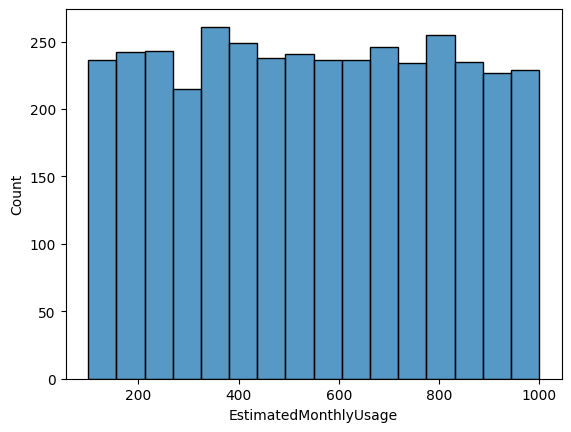

In [124]:
sns.histplot(train['EstimatedMonthlyUsage'])

In [125]:
train['EstimatedMonthlyUsage'].skew()

0.005115293724699924

##### Skewness > 0: Right-skewed (tail to the right). Skewness < 0: Left-skewed (tail to the left). Here we dont have much skewness

In [126]:
train['EstimatedMonthlyUsage'].fillna(train['EstimatedMonthlyUsage'].mean(),inplace=True)

In [127]:
train.isnull().sum()

CustomerID               0
Surname                  0
NetworkScore             0
Region                   0
Gender                   0
Age                      0
Tenure                   0
MonthlyCharge            0
NumOfProducts            0
HasInternetService       0
IsActiveMember           0
EstimatedMonthlyUsage    0
Exited                   0
dtype: int64

### Drop extra columns

In [128]:
train_new=train.drop(columns=[['CustomerID','Surname']]).copy()

In [130]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NetworkScore           4020 non-null   float64
 1   Region                 4020 non-null   object 
 2   Gender                 4020 non-null   object 
 3   Age                    4020 non-null   Int64  
 4   Tenure                 4020 non-null   int64  
 5   MonthlyCharge          4020 non-null   float64
 6   NumOfProducts          4020 non-null   int64  
 7   HasInternetService     4020 non-null   int64  
 8   IsActiveMember         4020 non-null   Int64  
 9   EstimatedMonthlyUsage  4020 non-null   float64
 10  Exited                 4020 non-null   int64  
dtypes: Int64(2), float64(3), int64(4), object(2)
memory usage: 353.4+ KB


### Data visualization

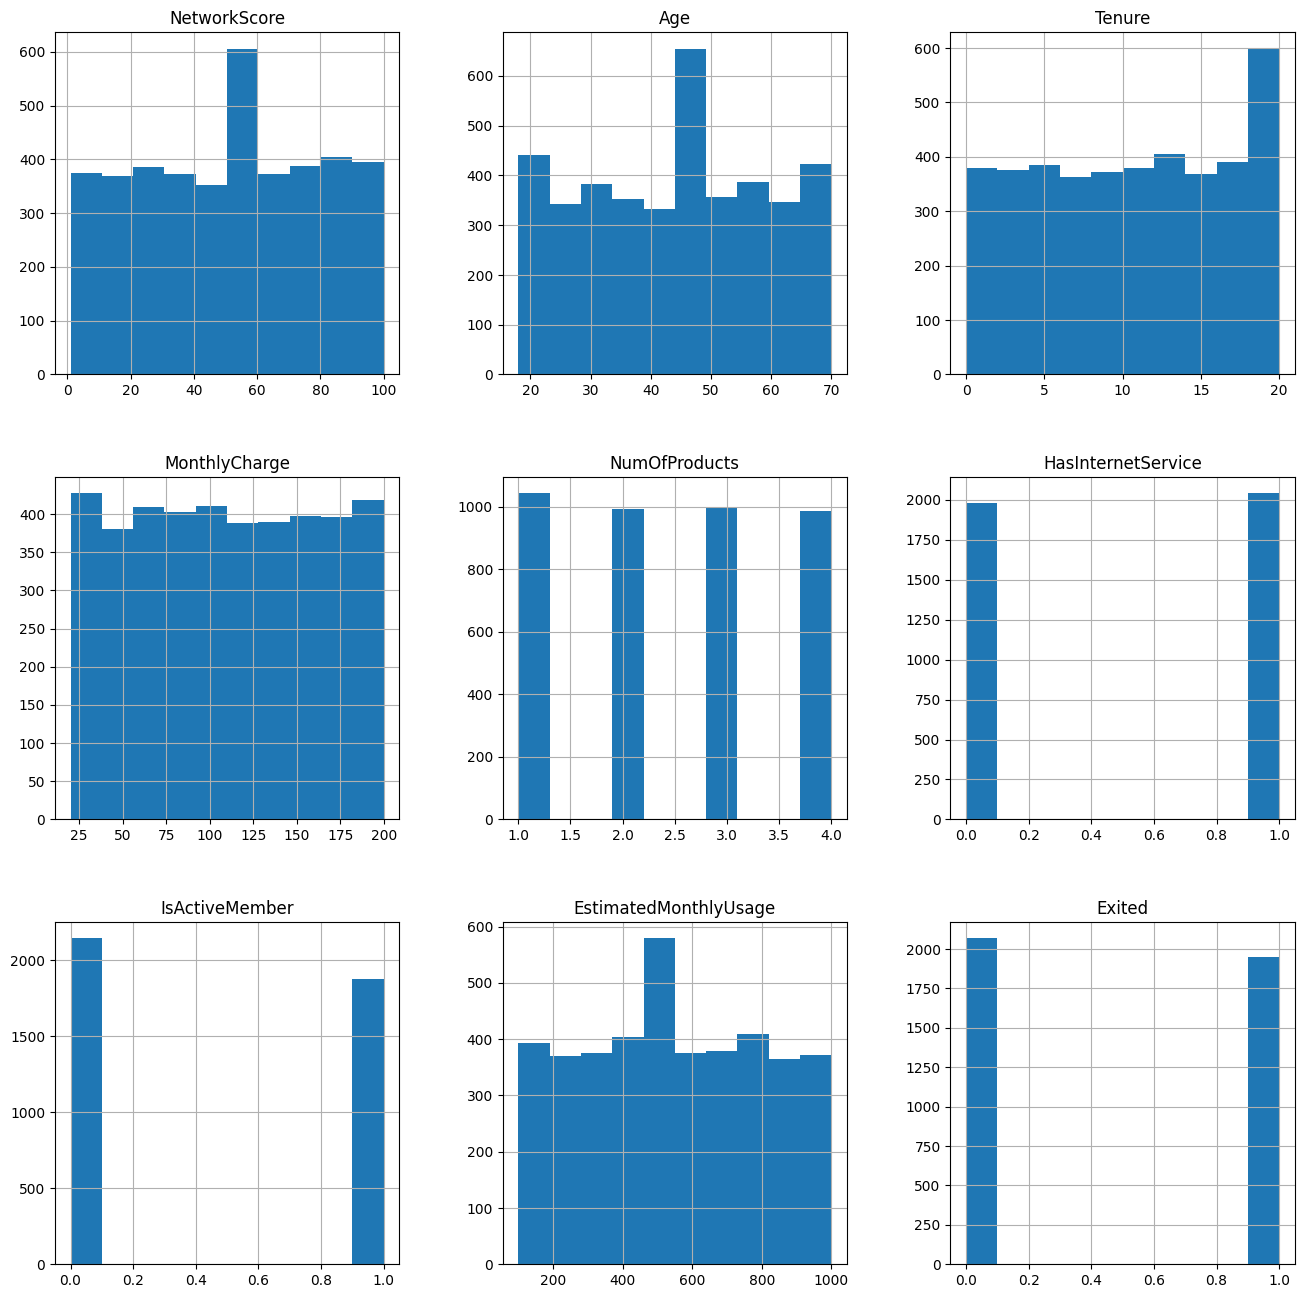

In [131]:
train_new[train_new.select_dtypes(include=['int64','float64']).columns].hist(figsize=(16,16))
plt.show()

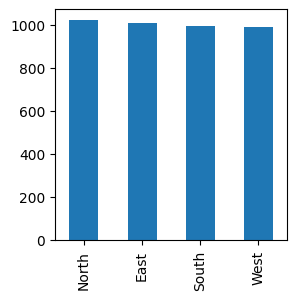

In [132]:
train_new['Region'].value_counts().plot(kind='bar',figsize=(3,3))
plt.show()

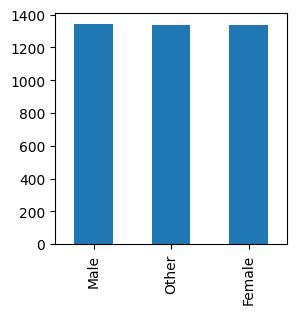

In [133]:
train_new['Gender'].value_counts().plot(kind='bar',figsize=(3,3))
plt.show()

### One-Hot Encoding

In [134]:
train_encoded=pd.get_dummies(train_new,columns=['Region','Gender'],drop_first=True)

In [135]:
train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NetworkScore           4020 non-null   float64
 1   Age                    4020 non-null   Int64  
 2   Tenure                 4020 non-null   int64  
 3   MonthlyCharge          4020 non-null   float64
 4   NumOfProducts          4020 non-null   int64  
 5   HasInternetService     4020 non-null   int64  
 6   IsActiveMember         4020 non-null   Int64  
 7   EstimatedMonthlyUsage  4020 non-null   float64
 8   Exited                 4020 non-null   int64  
 9   Region_North           4020 non-null   uint8  
 10  Region_South           4020 non-null   uint8  
 11  Region_West            4020 non-null   uint8  
 12  Gender_Male            4020 non-null   uint8  
 13  Gender_Other           4020 non-null   uint8  
dtypes: Int64(2), float64(3), int64(4), uint8(5)
memory usage

### Check collinearity

In [136]:
train_corr=train_encoded.corr().copy()

In [137]:
corr_pairs=train_corr.abs().unstack().sort_values(ascending=False)

In [138]:
corr_pairs[(corr_pairs<1)& (corr_pairs>.8)]

Series([], dtype: float64)

#### No collinearity!!

### Train-Test split

In [141]:
from sklearn.model_selection import train_test_split

In [144]:
X=train_encoded.drop('Exited',axis=1)
Y=train_encoded['Exited']

In [147]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.2,random_state=42)

### Cross-Validation

In [165]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import precision_score,make_scorer,recall_score,f1_score

In [156]:
model=XGBClassifier(eval_metric='logloss', random_state=42)

In [157]:
scores=cross_val_score(model,x_train,y_train,cv=5,scoring=make_scorer(precision_score))

In [159]:
scores.mean()

0.6912140107554313

##### Accuracy scores are consistent so proceeding with model training

In [160]:
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=42, ...)

In [161]:
y_pred=model.predict(x_test)

In [163]:
precision=precision_score(y_test,y_pred)

In [164]:
precision

0.6843373493975904

In [166]:
recall=recall_score(y_test,y_pred)

In [167]:
recall

0.7473684210526316

In [168]:
f1_score=f1_score(y_test,y_pred)

In [169]:
f1_score

0.7144654088050314

### Prediction for test set

##### We will apply the same pre-processing on test data for predictions

In [170]:
test=pd.read_csv('test_data.csv')

In [171]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             1980 non-null   int64  
 1   Surname                1980 non-null   object 
 2   NetworkScore           1879 non-null   float64
 3   Region                 1980 non-null   object 
 4   Gender                 1980 non-null   object 
 5   Age                    1888 non-null   float64
 6   Tenure                 1980 non-null   int64  
 7   MonthlyCharge          1980 non-null   float64
 8   NumOfProducts          1980 non-null   int64  
 9   HasInternetService     1980 non-null   int64  
 10  IsActiveMember         1878 non-null   float64
 11  EstimatedMonthlyUsage  1877 non-null   float64
 12  Exited                 0 non-null      float64
dtypes: float64(6), int64(4), object(3)
memory usage: 201.2+ KB


In [172]:
test['Age']=test['Age'].astype('Int64')
test['IsActiveMember']=test['IsActiveMember'].astype('Int64')

In [173]:
test.isnull().sum()

CustomerID                  0
Surname                     0
NetworkScore              101
Region                      0
Gender                      0
Age                        92
Tenure                      0
MonthlyCharge               0
NumOfProducts               0
HasInternetService          0
IsActiveMember            102
EstimatedMonthlyUsage     103
Exited                   1980
dtype: int64

In [174]:
test['NetworkScore'].fillna(test['NetworkScore'].median(),inplace=True)

In [175]:
test['Age'].fillna(test['Age'].median(),inplace=True)

In [176]:
test['IsActiveMember'].fillna(test['IsActiveMember'].mode()[0],inplace=True)

In [177]:
test['EstimatedMonthlyUsage'].fillna(test['EstimatedMonthlyUsage'].mean(),inplace=True)

In [178]:
test.isnull().sum()

CustomerID                  0
Surname                     0
NetworkScore                0
Region                      0
Gender                      0
Age                         0
Tenure                      0
MonthlyCharge               0
NumOfProducts               0
HasInternetService          0
IsActiveMember              0
EstimatedMonthlyUsage       0
Exited                   1980
dtype: int64

In [206]:
test_new=test.drop(columns=['CustomerID','Surname','Exited']).copy()

In [207]:
test_encoded=pd.get_dummies(test_new,columns=['Region','Gender'],drop_first=True)

In [208]:
test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NetworkScore           1980 non-null   float64
 1   Age                    1980 non-null   Int64  
 2   Tenure                 1980 non-null   int64  
 3   MonthlyCharge          1980 non-null   float64
 4   NumOfProducts          1980 non-null   int64  
 5   HasInternetService     1980 non-null   int64  
 6   IsActiveMember         1980 non-null   Int64  
 7   EstimatedMonthlyUsage  1980 non-null   float64
 8   Region_North           1980 non-null   uint8  
 9   Region_South           1980 non-null   uint8  
 10  Region_West            1980 non-null   uint8  
 11  Gender_Male            1980 non-null   uint8  
 12  Gender_Other           1980 non-null   uint8  
dtypes: Int64(2), float64(3), int64(3), uint8(5)
memory usage: 137.4 KB


In [209]:
predictions=model.predict(test_encoded)

In [210]:
predictions

array([1, 0, 0, ..., 1, 1, 0])

In [211]:
submission=test[['CustomerID']].copy()

In [212]:
submission['Exited']=predictions

In [213]:
submission

,CustomerID,Exited
0,5081,1
1,3273,0
2,3565,0
3,2735,1
4,2163,1
...,...,...
1975,2588,1
1976,3324,0
1977,1901,1
1978,4629,1


In [214]:
submission.to_csv('submission.csv',index=False)